In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [3]:
# Define file paths
children_path = '../Data/Raw/Children.DTA'
household_path = '../Data/Raw/Household.DTA'
individual_path = '../Data/Raw/Individuals.DTA'

print("Loading datasets... This may take a few minutes.\n")

Loading datasets... This may take a few minutes.



In [4]:
# Load Children's Recode (main dataset)
print("📂 Loading Children's Recode...")
children_df = pd.read_stata(children_path, convert_categoricals=False)
print(f"   Shape: {children_df.shape}")
print(f"   Columns: {children_df.shape[1]}")
print(f"   Rows: {children_df.shape[0]:,}\n")

📂 Loading Children's Recode...
   Shape: (232920, 1644)
   Columns: 1644
   Rows: 232,920



In [9]:
# Search for malnutrition indicators
print("🔍 Searching for key malnutrition variables...\n")

# Anthropometric indicators
anthro_vars = [col for col in children_df.columns if any(x in col.lower() 
               for x in ['hw70', 'hw71', 'hw72', 'height', 'weight', 'age'])]

print("📏 Anthropometric variables (height, weight, age):")
for var in anthro_vars[:15]:
    print(f"  - {var}")

# Location variables
print("\n📍 Location variables:")
location_vars = [col for col in children_df.columns if any(x in col.lower() 
                 for x in ['dist', 'state', 'v024', 'shdist'])]
for var in location_vars:
    print(f"  - {var}")

# Socioeconomic variables
print("\n💰 Socioeconomic variables:")
socio_vars = [col for col in children_df.columns if any(x in col.lower() 
              for x in ['wealth', 'educ', 'v106', 'v190'])]
for var in socio_vars[:10]:
    print(f"  - {var}")

🔍 Searching for key malnutrition variables...

📏 Anthropometric variables (height, weight, age):
  - hw70
  - hw71
  - hw72
  - sweight
  - sdweight

📍 Location variables:
  - v024
  - sdist

💰 Socioeconomic variables:
  - v106
  - v190
  - v190a


In [10]:
# Let's look at these key variables
key_vars = ['hw70', 'hw71', 'hw72', 'sdist', 'v024', 'v106', 'v190']

print("📊 Sample data with key variables:\n")
print(children_df[key_vars].head(10))

print("\n" + "="*60)
print("BASIC STATISTICS")
print("="*60)

# Check data types
print("\nData types:")
print(children_df[key_vars].dtypes)

print("\nBasic statistics:")
print(children_df[key_vars].describe())

📊 Sample data with key variables:

     hw70    hw71    hw72  sdist  v024  v106  v190
0   526.0  -207.0  9996.0      1     1     2     3
1   565.0   150.0  -139.0      1     1     1     1
2   461.0   153.0  -116.0      1     1     2     1
3   498.0  -224.0  9998.0      1     1     2     3
4   298.0  -131.0  -432.0      1     1     2     2
5    13.0   272.0   393.0      1     1     2     5
6  9998.0  9998.0   -25.0      1     1     2     3
7    51.0   304.0   350.0      1     1     0     3
8  9998.0  9998.0   383.0      1     1     2     4
9     NaN     NaN     NaN      1     1     2     3

BASIC STATISTICS

Data types:
hw70     float64
hw71     float64
hw72     float64
sdist      int16
v024        int8
v106        int8
v190        int8
dtype: object

Basic statistics:
                hw70           hw71           hw72          sdist  \
count  211089.000000  211684.000000  214531.000000  232920.000000   
mean      111.830337     -83.958060     524.478411     395.640593   
std      1560.

In [11]:
# Replace DHS missing value codes with NaN
print("🧹 Cleaning missing value codes...\n")

# DHS uses 9996-9999 for missing values
missing_codes = [9996, 9997, 9998, 9999]

# Count missing before cleaning
print("Missing values BEFORE cleaning:")
print(f"hw70: {children_df['hw70'].isnull().sum()}")
print(f"hw71: {children_df['hw71'].isnull().sum()}")
print(f"hw72: {children_df['hw72'].isnull().sum()}")

# Replace missing codes
for col in ['hw70', 'hw71', 'hw72']:
    children_df[col] = children_df[col].replace(missing_codes, np.nan)

print("\nMissing values AFTER cleaning:")
print(f"hw70: {children_df['hw70'].isnull().sum()}")
print(f"hw71: {children_df['hw71'].isnull().sum()}")
print(f"hw72: {children_df['hw72'].isnull().sum()}")

print("\n✅ Missing value codes cleaned!")

🧹 Cleaning missing value codes...

Missing values BEFORE cleaning:
hw70: 21831
hw71: 21236
hw72: 18389

Missing values AFTER cleaning:
hw70: 26895
hw71: 22396
hw72: 31233

✅ Missing value codes cleaned!


In [12]:
# Calculate malnutrition indicators
# WHO definition: Z-score < -200 (which is -2 SD)

print("📊 MALNUTRITION PREVALENCE (Overall)\n")
print("="*50)

# Stunting (hw70 < -200)
valid_hw70 = children_df['hw70'].notna()
stunted = (children_df['hw70'] < -200) & valid_hw70
stunting_prev = (stunted.sum() / valid_hw70.sum()) * 100

print(f"🔴 STUNTING (Height-for-age < -2 SD)")
print(f"   Prevalence: {stunting_prev:.2f}%")
print(f"   Children stunted: {stunted.sum():,}")
print(f"   Total measured: {valid_hw70.sum():,}\n")

# Wasting (hw72 < -200)
valid_hw72 = children_df['hw72'].notna()
wasted = (children_df['hw72'] < -200) & valid_hw72
wasting_prev = (wasted.sum() / valid_hw72.sum()) * 100

print(f"🟠 WASTING (Weight-for-height < -2 SD)")
print(f"   Prevalence: {wasting_prev:.2f}%")
print(f"   Children wasted: {wasted.sum():,}")
print(f"   Total measured: {valid_hw72.sum():,}\n")

# Underweight (hw71 < -200)
valid_hw71 = children_df['hw71'].notna()
underweight = (children_df['hw71'] < -200) & valid_hw71
underweight_prev = (underweight.sum() / valid_hw71.sum()) * 100

print(f"🟡 UNDERWEIGHT (Weight-for-age < -2 SD)")
print(f"   Prevalence: {underweight_prev:.2f}%")
print(f"   Children underweight: {underweight.sum():,}")
print(f"   Total measured: {valid_hw71.sum():,}\n")

print("="*50)

📊 MALNUTRITION PREVALENCE (Overall)

🔴 STUNTING (Height-for-age < -2 SD)
   Prevalence: 35.47%
   Children stunted: 73,072
   Total measured: 206,025

🟠 WASTING (Weight-for-height < -2 SD)
   Prevalence: 18.62%
   Children wasted: 37,553
   Total measured: 201,687

🟡 UNDERWEIGHT (Weight-for-age < -2 SD)
   Prevalence: 30.90%
   Children underweight: 65,043
   Total measured: 210,524



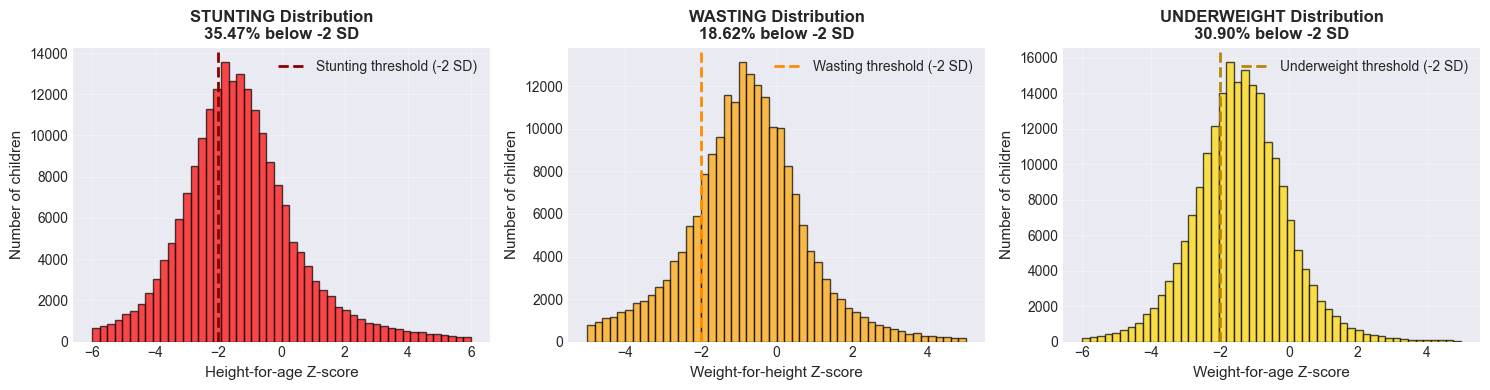


✅ Visualization complete!


In [13]:
# Visualize the distribution of malnutrition indicators
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Stunting
axes[0].hist(children_df['hw70'].dropna()/100, bins=50, edgecolor='black', alpha=0.7, color='red')
axes[0].axvline(-2, color='darkred', linestyle='--', linewidth=2, label='Stunting threshold (-2 SD)')
axes[0].set_xlabel('Height-for-age Z-score', fontsize=11)
axes[0].set_ylabel('Number of children', fontsize=11)
axes[0].set_title('STUNTING Distribution\n35.47% below -2 SD', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Wasting
axes[1].hist(children_df['hw72'].dropna()/100, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].axvline(-2, color='darkorange', linestyle='--', linewidth=2, label='Wasting threshold (-2 SD)')
axes[1].set_xlabel('Weight-for-height Z-score', fontsize=11)
axes[1].set_ylabel('Number of children', fontsize=11)
axes[1].set_title('WASTING Distribution\n18.62% below -2 SD', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Underweight
axes[2].hist(children_df['hw71'].dropna()/100, bins=50, edgecolor='black', alpha=0.7, color='gold')
axes[2].axvline(-2, color='darkgoldenrod', linestyle='--', linewidth=2, label='Underweight threshold (-2 SD)')
axes[2].set_xlabel('Weight-for-age Z-score', fontsize=11)
axes[2].set_ylabel('Number of children', fontsize=11)
axes[2].set_title('UNDERWEIGHT Distribution\n30.90% below -2 SD', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Visualization complete!")

In [14]:
# Analyze district-level distribution
print("📍 DISTRICT-LEVEL ANALYSIS\n")
print("="*60)

# Count unique districts
n_districts = children_df['sdist'].nunique()
print(f"Total unique districts: {n_districts}")

# Check sample size per district
district_counts = children_df['sdist'].value_counts().sort_index()

print(f"\nSample size per district:")
print(f"  Minimum: {district_counts.min()} children")
print(f"  Maximum: {district_counts.max()} children")
print(f"  Mean: {district_counts.mean():.0f} children")
print(f"  Median: {district_counts.median():.0f} children")

print(f"\n📊 Top 10 districts by sample size:")
top_districts = district_counts.nlargest(10)
for dist, count in top_districts.items():
    print(f"  District {dist}: {count} children")

print(f"\n📊 Districts with smallest samples:")
small_districts = district_counts.nsmallest(10)
for dist, count in small_districts.items():
    print(f"  District {dist}: {count} children")

print("\n" + "="*60)

📍 DISTRICT-LEVEL ANALYSIS

Total unique districts: 707

Sample size per district:
  Minimum: 57 children
  Maximum: 1135 children
  Mean: 329 children
  Median: 304 children

📊 Top 10 districts by sample size:
  District 878: 1135 children
  District 872: 995 children
  District 875: 972 children
  District 877: 800 children
  District 209: 750 children
  District 223: 728 children
  District 181: 717 children
  District 297: 693 children
  District 208: 677 children
  District 180: 671 children

📊 Districts with smallest samples:
  District 451: 57 children
  District 444: 101 children
  District 518: 114 children
  District 599: 115 children
  District 639: 115 children
  District 446: 121 children
  District 519: 124 children
  District 603: 126 children
  District 243: 133 children
  District 529: 137 children



In [15]:
# Aggregate malnutrition data at district level
print("🎯 Creating District-Level Dataset for ML...\n")

# Create malnutrition flags
children_df['is_stunted'] = (children_df['hw70'] < -200).astype(float)
children_df['is_wasted'] = (children_df['hw72'] < -200).astype(float)
children_df['is_underweight'] = (children_df['hw71'] < -200).astype(float)

# Aggregate by district
district_malnutrition = children_df.groupby('sdist').agg({
    # Target variables (malnutrition prevalence %)
    'is_stunted': 'mean',
    'is_wasted': 'mean',
    'is_underweight': 'mean',
    
    # Sample size
    'hw70': 'count',
    
    # Predictors - socioeconomic
    'v190': 'mean',  # Wealth index
    'v106': 'mean',  # Mother's education
    'v024': 'first'  # State
}).reset_index()

# Rename columns
district_malnutrition.columns = [
    'district', 
    'stunting_rate', 
    'wasting_rate', 
    'underweight_rate',
    'sample_size',
    'avg_wealth_index',
    'avg_mother_education',
    'state'
]

# Convert rates to percentages
district_malnutrition['stunting_rate'] *= 100
district_malnutrition['wasting_rate'] *= 100
district_malnutrition['underweight_rate'] *= 100

print(f"✅ District dataset created!")
print(f"   Shape: {district_malnutrition.shape}")
print(f"\n📊 First 10 districts:\n")
print(district_malnutrition.head(10))

print(f"\n📈 Summary statistics:\n")
print(district_malnutrition[['stunting_rate', 'wasting_rate', 'underweight_rate']].describe())

🎯 Creating District-Level Dataset for ML...

✅ District dataset created!
   Shape: (707, 8)

📊 First 10 districts:

   district  stunting_rate  wasting_rate  underweight_rate  sample_size  \
0         1      23.219814     21.671827         25.077399          300   
1         2      24.475524     16.783217         20.279720          267   
2         3      21.317829     14.341085         17.441860          229   
3         4      33.948339     16.236162         21.033210          253   
4         5      24.415584     14.805195         18.181818          361   
5         6      28.482972     20.123839         30.650155          306   
6         7      17.032967     14.835165         21.978022          141   
7         8      20.520231     16.184971         16.184971          311   
8         9      21.885522     11.447811         14.814815          252   
9        10      29.535865     16.455696         15.189873          216   

   avg_wealth_index  avg_mother_education  state  
0      

C:\Users\lenovo\AppData\Local\Temp\ipykernel_20276\1972847734.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  children_df['is_stunted'] = (children_df['hw70'] < -200).astype(float)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_20276\1972847734.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  children_df['is_wasted'] = (children_df['hw72'] < -200).astype(float)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_20276\1972847734.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

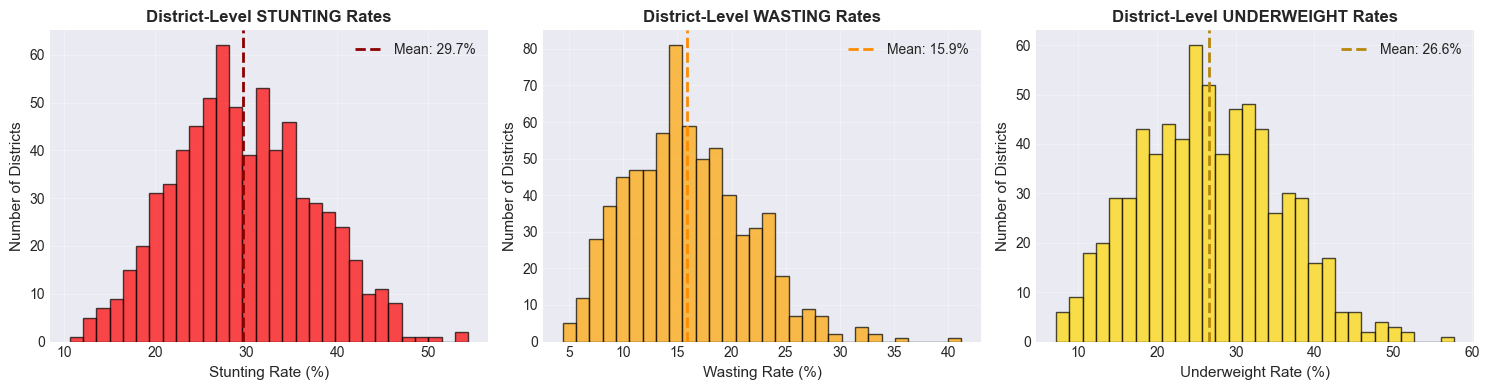


✅ District-level variation visualized!

📊 Range of malnutrition across districts:
   Stunting: 10.6% to 54.4%
   Wasting: 4.4% to 41.2%
   Underweight: 7.2% to 57.8%


In [16]:
# Visualize district-level malnutrition rates
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Stunting by district
axes[0].hist(district_malnutrition['stunting_rate'], bins=30, edgecolor='black', alpha=0.7, color='red')
axes[0].axvline(district_malnutrition['stunting_rate'].mean(), color='darkred', linestyle='--', linewidth=2, label=f"Mean: {district_malnutrition['stunting_rate'].mean():.1f}%")
axes[0].set_xlabel('Stunting Rate (%)', fontsize=11)
axes[0].set_ylabel('Number of Districts', fontsize=11)
axes[0].set_title('District-Level STUNTING Rates', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Wasting by district
axes[1].hist(district_malnutrition['wasting_rate'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1].axvline(district_malnutrition['wasting_rate'].mean(), color='darkorange', linestyle='--', linewidth=2, label=f"Mean: {district_malnutrition['wasting_rate'].mean():.1f}%")
axes[1].set_xlabel('Wasting Rate (%)', fontsize=11)
axes[1].set_ylabel('Number of Districts', fontsize=11)
axes[1].set_title('District-Level WASTING Rates', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Underweight by district
axes[2].hist(district_malnutrition['underweight_rate'], bins=30, edgecolor='black', alpha=0.7, color='gold')
axes[2].axvline(district_malnutrition['underweight_rate'].mean(), color='darkgoldenrod', linestyle='--', linewidth=2, label=f"Mean: {district_malnutrition['underweight_rate'].mean():.1f}%")
axes[2].set_xlabel('Underweight Rate (%)', fontsize=11)
axes[2].set_ylabel('Number of Districts', fontsize=11)
axes[2].set_title('District-Level UNDERWEIGHT Rates', fontsize=12, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ District-level variation visualized!")
print(f"\n📊 Range of malnutrition across districts:")
print(f"   Stunting: {district_malnutrition['stunting_rate'].min():.1f}% to {district_malnutrition['stunting_rate'].max():.1f}%")
print(f"   Wasting: {district_malnutrition['wasting_rate'].min():.1f}% to {district_malnutrition['wasting_rate'].max():.1f}%")
print(f"   Underweight: {district_malnutrition['underweight_rate'].min():.1f}% to {district_malnutrition['underweight_rate'].max():.1f}%")

In [17]:
# Save the district-level dataset
import os

# Create processed data folder if it doesn't exist
processed_folder = '../Data/Processed'
os.makedirs(processed_folder, exist_ok=True)

# Save to CSV
output_path = os.path.join(processed_folder, 'district_malnutrition.csv')
district_malnutrition.to_csv(output_path, index=False)

print(f"✅ District dataset saved to: {output_path}")
print(f"\n📊 Dataset summary:")
print(f"   Rows (districts): {len(district_malnutrition)}")
print(f"   Columns: {len(district_malnutrition.columns)}")
print(f"\nColumns saved:")
for col in district_malnutrition.columns:
    print(f"   - {col}")

✅ District dataset saved to: ../Data/Processed\district_malnutrition.csv

📊 Dataset summary:
   Rows (districts): 707
   Columns: 8

Columns saved:
   - district
   - stunting_rate
   - wasting_rate
   - underweight_rate
   - sample_size
   - avg_wealth_index
   - avg_mother_education
   - state


In [18]:
# Comprehensive feature extraction
print("🔍 EXTRACTING ADDITIONAL FEATURES FOR ML MODEL\n")
print("="*70)

# Let's explore what variables we have
print("Total columns in children's dataset:", len(children_df.columns))

# Search for different categories of variables
categories = {
    'Water & Sanitation': ['water', 'toilet', 'hv201', 'hv205'],
    'Household Assets': ['tv', 'radio', 'bike', 'car', 'phone', 'fridge', 'hv206', 'hv207', 'hv208', 'hv209', 'hv243'],
    'Cooking & Energy': ['cooking', 'fuel', 'electric', 'hv226'],
    'Mother Health': ['bmi', 'anemia', 'v445', 'v457'],
    'Antenatal Care': ['anc', 'v459', 'v461', 'prenatal'],
    'Child Health': ['vaccin', 'immun', 'h2', 'h3', 'breastfeed', 'm4'],
    'Demographics': ['age', 'birth', 'v008', 'b8', 'v013'],
    'Housing': ['floor', 'wall', 'roof', 'rooms', 'hv213', 'hv214', 'hv215']
}

found_features = {}

for category, patterns in categories.items():
    found = [col for col in children_df.columns if any(p in col.lower() for p in patterns)]
    if found:
        found_features[category] = found
        print(f"\n📌 {category}: {len(found)} variables found")
        for var in found[:10]:  # Show first 10
            print(f"   - {var}")
        if len(found) > 10:
            print(f"   ... and {len(found) - 10} more")

print("\n" + "="*70)
print(f"\n✅ Total feature categories found: {len(found_features)}")
print(f"✅ Ready to engineer features for district-level aggregation!")

🔍 EXTRACTING ADDITIONAL FEATURES FOR ML MODEL

Total columns in children's dataset: 1647

📌 Mother Health: 2 variables found
   - v445
   - v457

📌 Antenatal Care: 2 variables found
   - v459
   - v461

📌 Child Health: 102 variables found
   - m4
   - m42a
   - m42b
   - m42c
   - m42d
   - m42e
   - m43
   - m44
   - m45
   - m46
   ... and 92 more

📌 Demographics: 6 variables found
   - v008
   - v008a
   - v013
   - b8
   - sb80
   - sb81


✅ Total feature categories found: 4
✅ Ready to engineer features for district-level aggregation!


In [19]:
# More targeted search for specific important variables
print("🔍 TARGETED FEATURE SEARCH\n")
print("="*70)

# Key variables we want to find
target_vars = {
    # Household characteristics
    'hv206': 'Has electricity',
    'hv201': 'Source of drinking water',
    'hv205': 'Type of toilet',
    'hv207': 'Has radio',
    'hv208': 'Has television',
    'hv209': 'Has refrigerator',
    'hv210': 'Has bicycle',
    'hv211': 'Has motorcycle',
    'hv212': 'Has car',
    'hv221': 'Has telephone',
    'hv243a': 'Has mobile phone',
    'hv226': 'Type of cooking fuel',
    'hv213': 'Has floor material',
    'hv025': 'Urban/Rural',
    
    # Mother characteristics
    'v012': 'Mother age',
    'v133': 'Mother education years',
    'v151': 'Sex of household head',
    'v190': 'Wealth index',
    'v445': 'Mother BMI',
    'v714': 'Mother works',
    
    # Child characteristics
    'b4': 'Child sex',
    'hw1': 'Child age in months',
    'b8': 'Birth interval',
    'm4': 'Duration of breastfeeding',
    'm19': 'Breastfeeding status',
    
    # Healthcare access
    'v394': 'Knowledge of ORS',
    'v437': 'Weight at birth',
    'h2': 'BCG vaccination',
    'h3': 'DPT vaccination',
    'h9': 'Measles vaccination'
}

# Check which variables exist
print("Checking for key variables...\n")

available = {}
missing = {}

for var, description in target_vars.items():
    if var in children_df.columns:
        available[var] = description
        print(f"✅ {var:10} - {description}")
    else:
        missing[var] = description

if missing:
    print(f"\n❌ Missing variables ({len(missing)}):")
    for var, desc in list(missing.items())[:10]:
        print(f"   {var:10} - {desc}")

print("\n" + "="*70)
print(f"\n📊 Summary:")
print(f"   Available: {len(available)} variables")
print(f"   Missing: {len(missing)} variables")
print(f"\n✅ We have {len(available)} high-quality features to use!")

🔍 TARGETED FEATURE SEARCH

Checking for key variables...

✅ v012       - Mother age
✅ v133       - Mother education years
✅ v151       - Sex of household head
✅ v190       - Wealth index
✅ v445       - Mother BMI
✅ v714       - Mother works
✅ b4         - Child sex
✅ hw1        - Child age in months
✅ b8         - Birth interval
✅ m4         - Duration of breastfeeding
✅ m19        - Breastfeeding status
✅ v394       - Knowledge of ORS
✅ v437       - Weight at birth
✅ h2         - BCG vaccination
✅ h3         - DPT vaccination
✅ h9         - Measles vaccination

❌ Missing variables (14):
   hv206      - Has electricity
   hv201      - Source of drinking water
   hv205      - Type of toilet
   hv207      - Has radio
   hv208      - Has television
   hv209      - Has refrigerator
   hv210      - Has bicycle
   hv211      - Has motorcycle
   hv212      - Has car
   hv221      - Has telephone


📊 Summary:
   Available: 16 variables
   Missing: 14 variables

✅ We have 16 high-quality featur

In [20]:
# Search for household variables with different naming patterns
print("🔍 Searching for household assets with alternate names...\n")

# Check all columns that start with 'hv' or 'sh' (state-specific household vars)
hv_vars = [col for col in children_df.columns if col.lower().startswith('hv') or col.lower().startswith('sh')]
print(f"Found {len(hv_vars)} variables starting with 'hv' or 'sh':")
print(hv_vars[:30])  # Show first 30
if len(hv_vars) > 30:
    print(f"... and {len(hv_vars) - 30} more")

# Also check for 's' variables (often state-level household vars in NFHS)
s_vars = [col for col in children_df.columns if col.lower().startswith('s') and len(col) <= 10]
print(f"\nOther 's' variables found: {len(s_vars)}")
print(s_vars[:20])

print("\n" + "="*70)

🔍 Searching for household assets with alternate names...

Found 1 variables starting with 'hv' or 'sh':
['sh29ca']

Other 's' variables found: 560
['ssmod', 'sdist', 'sphase', 'sweight', 'sdweight', 's113', 's116', 's234', 's235', 's236', 's238', 's239', 's240', 's241', 's242', 's243', 's244', 's244a', 's244b', 's245a']



In [21]:
# Explore the 's' variables to understand what they contain
print("🔍 EXPLORING 'S' VARIABLES (likely household/socioeconomic data)\n")
print("="*70)

# Get all 's' variables
s_vars = [col for col in children_df.columns if col.lower().startswith('s') and len(col) <= 10]

# Look at their data to understand what they are
print(f"Total 's' variables: {len(s_vars)}\n")

# Sample a few to see their values
sample_vars = ['s113', 's116', 's234', 's235', 's236', 's238', 's239', 's240', 's241', 's242', 's243', 's244']

print("Sample of 's' variables with their value distributions:\n")

for var in sample_vars:
    if var in children_df.columns:
        print(f"\n{var}:")
        print(children_df[var].value_counts().head(5))
        print(f"  Non-null count: {children_df[var].notna().sum()}")

# Also check if there are any 'v1' or 'v2' or 'v3' pattern variables (common NFHS naming)
print("\n" + "="*70)
print("\nLet's also check 'v' variables (mother/household characteristics):\n")

v_vars = [col for col in children_df.columns if col.lower().startswith('v') and len(col) <= 5]
print(f"Found {len(v_vars)} 'v' variables")
print("Sample:", v_vars[:30])

🔍 EXPLORING 'S' VARIABLES (likely household/socioeconomic data)

Total 's' variables: 560

Sample of 's' variables with their value distributions:


s113:
s113
0.0    217583
1.0     15336
Name: count, dtype: int64
  Non-null count: 232919

s116:
s116
3.0    89093
1.0    47848
2.0    47118
4.0    36573
8.0     1605
Name: count, dtype: int64
  Non-null count: 222237

s234:
s234
1.0    15367
2.0     5627
3.0     1963
Name: count, dtype: int64
  Non-null count: 22957

s235:
s235
2.0    7762
3.0    5861
1.0    3463
4.0    1895
9.0    1095
Name: count, dtype: int64
  Non-null count: 22957

s236:
s236
0.0    13077
1.0     9880
Name: count, dtype: int64
  Non-null count: 22957

s238:
s238
41.0    2452
51.0    1584
11.0     702
21.0     350
42.0     198
Name: count, dtype: int64
  Non-null count: 5627

s239:
s239
1.0    2902
6.0    1554
2.0     865
5.0     232
7.0      30
Name: count, dtype: int64
  Non-null count: 5627

s240:
s240
1.0    3873
3.0     913
2.0     650
9.0     131
4.0      60
Nam

In [22]:
# Create enhanced district-level dataset with many more features
print("🎯 CREATING COMPREHENSIVE DISTRICT-LEVEL DATASET\n")
print("="*70)

# Define all features we want to aggregate at district level
feature_list = {
    # Already have these
    'v190': 'mean',      # Wealth index
    'v106': 'mean',      # Mother's education level
    
    # Mother characteristics
    'v012': 'mean',      # Mother's age
    'v133': 'mean',      # Mother's education in years
    'v445': 'mean',      # Mother's BMI
    'v714': 'mean',      # Mother works (0/1)
    'v151': 'mean',      # Female-headed household
    
    # Child characteristics
    'hw1': 'mean',       # Child age in months
    'b4': 'mean',        # Child sex (1=male, 2=female)
    'b8': 'mean',        # Birth interval
    'v437': 'mean',      # Birth weight
    
    # Breastfeeding & nutrition
    'm4': 'mean',        # Duration of breastfeeding
    'm19': 'mean',       # Currently breastfeeding
    
    # Healthcare & immunization
    'h2': 'mean',        # BCG vaccination
    'h3': 'mean',        # DPT vaccination  
    'h9': 'mean',        # Measles vaccination
    'v394': 'mean',      # Knowledge of ORS
    
    # Target variables
    'is_stunted': 'mean',
    'is_wasted': 'mean', 
    'is_underweight': 'mean'
}

# Add state and sample size
print("Aggregating features by district...\n")

# Create aggregation dictionary
agg_dict = feature_list.copy()
agg_dict['v024'] = 'first'  # State (just take first value)
agg_dict['hw70'] = 'count'  # Sample size

# Aggregate
district_enhanced = children_df.groupby('sdist').agg(agg_dict).reset_index()

# Rename columns for clarity
new_names = {
    'sdist': 'district',
    'v190': 'wealth_index',
    'v106': 'mother_edu_level',
    'v012': 'mother_age',
    'v133': 'mother_edu_years',
    'v445': 'mother_bmi',
    'v714': 'mother_works',
    'v151': 'female_headed_hh',
    'hw1': 'child_age_months',
    'b4': 'child_sex',
    'b8': 'birth_interval',
    'v437': 'birth_weight',
    'm4': 'breastfeed_duration',
    'm19': 'currently_breastfeed',
    'h2': 'bcg_vaccination',
    'h3': 'dpt_vaccination',
    'h9': 'measles_vaccination',
    'v394': 'knows_ors',
    'is_stunted': 'stunting_rate',
    'is_wasted': 'wasting_rate',
    'is_underweight': 'underweight_rate',
    'v024': 'state',
    'hw70': 'sample_size'
}

district_enhanced.rename(columns=new_names, inplace=True)

# Convert rates to percentages
district_enhanced['stunting_rate'] *= 100
district_enhanced['wasting_rate'] *= 100
district_enhanced['underweight_rate'] *= 100

print(f"✅ Enhanced dataset created!")
print(f"\n📊 Dataset shape: {district_enhanced.shape}")
print(f"   Districts: {district_enhanced.shape[0]}")
print(f"   Features: {district_enhanced.shape[1]}")

print(f"\n📋 Feature list ({district_enhanced.shape[1]} total):")
for i, col in enumerate(district_enhanced.columns, 1):
    print(f"   {i:2}. {col}")

print("\n" + "="*70)

🎯 CREATING COMPREHENSIVE DISTRICT-LEVEL DATASET

Aggregating features by district...

✅ Enhanced dataset created!

📊 Dataset shape: (707, 23)
   Districts: 707
   Features: 23

📋 Feature list (23 total):
    1. district
    2. wealth_index
    3. mother_edu_level
    4. mother_age
    5. mother_edu_years
    6. mother_bmi
    7. mother_works
    8. female_headed_hh
    9. child_age_months
   10. child_sex
   11. birth_interval
   12. birth_weight
   13. breastfeed_duration
   14. currently_breastfeed
   15. bcg_vaccination
   16. dpt_vaccination
   17. measles_vaccination
   18. knows_ors
   19. stunting_rate
   20. wasting_rate
   21. underweight_rate
   22. state
   23. sample_size



In [23]:
# Preview the enhanced dataset
print("📊 ENHANCED DISTRICT DATASET PREVIEW\n")
print("="*70)

print("\nFirst 10 districts:")
print(district_enhanced.head(10))

print("\n\n📈 Summary Statistics of Key Features:\n")
print(district_enhanced.describe().round(2))

print("\n\n🔍 Check for missing values:")
missing = district_enhanced.isnull().sum()
print(missing[missing > 0])

print("\n" + "="*70)

# Save the enhanced dataset
output_path = '../Data/Processed/district_malnutrition_enhanced.csv'
district_enhanced.to_csv(output_path, index=False)

print(f"\n💾 SAVED: {output_path}")
print(f"\n✅ Dataset ready for machine learning!")
print(f"   • 707 districts")
print(f"   • 23 features")
print(f"   • 3 target variables (stunting, wasting, underweight)")
print(f"   • 19 predictor variables")

📊 ENHANCED DISTRICT DATASET PREVIEW


First 10 districts:
   district  wealth_index  mother_edu_level  mother_age  mother_edu_years  \
0         1      2.928793          1.628483   30.297214          7.873065   
1         2      3.332168          1.531469   30.569930          7.496503   
2         3      3.461240          1.686047   32.410853          8.100775   
3         4      2.387454          1.612546   30.428044          7.845018   
4         5      2.955844          1.594805   29.407792          7.641558   
5         6      2.910217          1.736842   27.557276          8.337461   
6         7      3.912088          1.961538   29.104396          9.983516   
7         8      2.950867          1.346821   30.511561          6.395954   
8         9      2.730640          1.269360   30.919192          5.989899   
9        10      4.109705          1.924051   30.974684          9.742616   

    mother_bmi  mother_works  female_headed_hh  child_age_months  child_sex  \
0  2429.767296 